In [1]:
from glob import glob
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import anndata
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import tarfile
import seaborn as sns
from collections import defaultdict, Counter, OrderedDict
import collections
import matplotlib as mpl
# Set global font sizes
mpl.rcParams.update({'font.size': 14, 'svg.fonttype': 'none'})
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14      # For x and y axis labels
mpl.rcParams['xtick.labelsize'] = 14     # For x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 14     # For y-axis tick labels  
mpl.rcParams['legend.fontsize'] = 14     # For legend text
mpl.rcParams['legend.title_fontsize'] = 14  # For legend titles


In [2]:
#read in rhpcr barcode airr file
Nested_PCR_trust_barcodes = pd.read_csv('/home/user/Documents/Kinase_project/TCR_clonaltype/NestedPCR_vs_rhPCR/NestedPCR/trust4_NestedPCR/NestedPCR_trust4_barcode_airr.tsv', sep='\t')
Nested_PCR_trust_barcodes

,sequence_id,sequence,rev_comp,productive,locus,v_call,d_call,j_call,c_call,sequence_alignment,...,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_identity,j_identity,cell_id,complete_vdj,consensus_count
0,GTAGATCGTTGAATCC_8143,CCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTGTA...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTGTA...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,223N57M38S10N,67S7N7M21S2N,77S7N18M25N,100.00,100.00,GTAGATCGTTGAATCC,F,1
1,CTGCAGGCATGTGCCG_8144,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M58S10N,70S7N7M41S2N,80S7N38M5N,100.00,100.00,CTGCAGGCATGTGCCG,F,17
2,TTACCGCCATTGACAC_8145,TCAAACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,4S220N60M94S10N,74S7N7M77S2N,84S7N43M31S,100.00,100.00,TTACCGCCATTGACAC,F,20
3,TACGCTCTCTGATTGC_8146,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M122S10N,70S7N7M105S2N,80S7N43M59S,100.00,100.00,TACGCTCTCTGATTGC,F,57
4,CGAGTTACATAGATCC_8147,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,221N59M58S10N,69S7N7M41S2N,79S7N38M5N,100.00,100.00,CGAGTTACATAGATCC,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ATCACTTCAACACAGG_13926,GCTCACTTAAATCTTCACATCAATTCCCTGGCCTCTGCCATAATTT...,F,T,TRB,TRBV3-1*01,TRBD1*01,NaN,NaN,NaN,...,TGCTCCCTCCTTCCTGAGGGGCCTCAGGGCTTGTGG,CSLLPEGPQGLW,213N31M80S43N,80S4N5M26S3N,NaN,100.00,NaN,ATCACTTCAACACAGG,F,1
371,CTCAAGAGTAGGTCAG_13999,CCNCTCTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCATGTA...,F,T,TRB,TRBV11-1*01,TRBD1*01,TRBJ2-5*01,NaN,CCNCTCTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCATGTA...,...,TGTGCCAGCAGCCCCGAGGGGCAGGAGACCCAGTACTTC,CASSPEGQETQYF,223N62M53S5N,67S8M40S4N,74S5N41M2N,100.00,100.00,CTCAAGAGTAGGTCAG,F,1
372,GCAGTTATCTAGTGAC_14004,CTTAAACCTTCACCTACACGCCCTGCAGCCAGAAGACTCGGCCCTG...,F,T,TRB,TRBV4-1*01,TRBD1*01,TRBJ2-3*01,NaN,CTTAAACCTTCACCTACACGCCCTGCAGCCAGAAGACTCGGCCCTG...,...,TGCGCCAGCAGCCAAAACAGCCCTACAGGGGCCTGGAGCACAGATA...,CASSQNSPTGAWSTDTQYF,218N67M44S2N,76S3N7M28S2N,88S23M26N,98.51,100.00,GCAGTTATCTAGTGAC,F,1
373,CCTCCTCTCGTAACTG_14005,CTTATTCCTNCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTG...,F,T,TRB,TRBV4-3*01,TRBD1*01,TRBJ2-3*01,NaN,CTTATTCCTNCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTG...,...,TGCGCCAGCAGCCAAAACAGCCCTACAGGGGCCTGGAGCACAGATA...,CASSQNSPTGAWSTDTQYF,218N67M83S2N,76S3N7M67S2N,88S49M13S,100.00,100.00,CCTCCTCTCGTAACTG,F,1


In [3]:
Nested_PCR_trust_barcodes

,sequence_id,sequence,rev_comp,productive,locus,v_call,d_call,j_call,c_call,sequence_alignment,...,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_identity,j_identity,cell_id,complete_vdj,consensus_count
0,GTAGATCGTTGAATCC_8143,CCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTGTA...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTGTA...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,223N57M38S10N,67S7N7M21S2N,77S7N18M25N,100.00,100.00,GTAGATCGTTGAATCC,F,1
1,CTGCAGGCATGTGCCG_8144,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M58S10N,70S7N7M41S2N,80S7N38M5N,100.00,100.00,CTGCAGGCATGTGCCG,F,17
2,TTACCGCCATTGACAC_8145,TCAAACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,4S220N60M94S10N,74S7N7M77S2N,84S7N43M31S,100.00,100.00,TTACCGCCATTGACAC,F,20
3,TACGCTCTCTGATTGC_8146,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M122S10N,70S7N7M105S2N,80S7N43M59S,100.00,100.00,TACGCTCTCTGATTGC,F,57
4,CGAGTTACATAGATCC_8147,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,221N59M58S10N,69S7N7M41S2N,79S7N38M5N,100.00,100.00,CGAGTTACATAGATCC,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,ATCACTTCAACACAGG_13926,GCTCACTTAAATCTTCACATCAATTCCCTGGCCTCTGCCATAATTT...,F,T,TRB,TRBV3-1*01,TRBD1*01,NaN,NaN,NaN,...,TGCTCCCTCCTTCCTGAGGGGCCTCAGGGCTTGTGG,CSLLPEGPQGLW,213N31M80S43N,80S4N5M26S3N,NaN,100.00,NaN,ATCACTTCAACACAGG,F,1
371,CTCAAGAGTAGGTCAG_13999,CCNCTCTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCATGTA...,F,T,TRB,TRBV11-1*01,TRBD1*01,TRBJ2-5*01,NaN,CCNCTCTCAAGATCCAGCCTGCAGAGCTTGGGGACTCGGCCATGTA...,...,TGTGCCAGCAGCCCCGAGGGGCAGGAGACCCAGTACTTC,CASSPEGQETQYF,223N62M53S5N,67S8M40S4N,74S5N41M2N,100.00,100.00,CTCAAGAGTAGGTCAG,F,1
372,GCAGTTATCTAGTGAC_14004,CTTAAACCTTCACCTACACGCCCTGCAGCCAGAAGACTCGGCCCTG...,F,T,TRB,TRBV4-1*01,TRBD1*01,TRBJ2-3*01,NaN,CTTAAACCTTCACCTACACGCCCTGCAGCCAGAAGACTCGGCCCTG...,...,TGCGCCAGCAGCCAAAACAGCCCTACAGGGGCCTGGAGCACAGATA...,CASSQNSPTGAWSTDTQYF,218N67M44S2N,76S3N7M28S2N,88S23M26N,98.51,100.00,GCAGTTATCTAGTGAC,F,1
373,CCTCCTCTCGTAACTG_14005,CTTATTCCTNCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTG...,F,T,TRB,TRBV4-3*01,TRBD1*01,TRBJ2-3*01,NaN,CTTATTCCTNCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTG...,...,TGCGCCAGCAGCCAAAACAGCCCTACAGGGGCCTGGAGCACAGATA...,CASSQNSPTGAWSTDTQYF,218N67M83S2N,76S3N7M67S2N,88S49M13S,100.00,100.00,CCTCCTCTCGTAACTG,F,1


In [4]:
#what if we filter out consensus counts less than 20
Nested_PCR_trust_barcodes.set_index('sequence_id', inplace=True)
Nested_PCR_trust_barcodes_df = Nested_PCR_trust_barcodes[Nested_PCR_trust_barcodes['consensus_count'] > 2]
Nested_PCR_trust_barcodes_df

,sequence,rev_comp,productive,locus,v_call,d_call,j_call,c_call,sequence_alignment,germline_alignment,...,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_identity,j_identity,cell_id,complete_vdj,consensus_count
sequence_id,,,,,,,,,,,,,,,,,,,,,
CTGCAGGCATGTGCCG_8144,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M58S10N,70S7N7M41S2N,80S7N38M5N,100.00,100.0,CTGCAGGCATGTGCCG,F,17
TTACCGCCATTGACAC_8145,TCAAACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,4S220N60M94S10N,74S7N7M77S2N,84S7N43M31S,100.00,100.0,TTACCGCCATTGACAC,F,20
TACGCTCTCTGATTGC_8146,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,TRBC2*01,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M122S10N,70S7N7M105S2N,80S7N43M59S,100.00,100.0,TACGCTCTCTGATTGC,F,57
TCCTAATTCTGTGCTC_8148,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M94S10N,70S7N7M77S2N,80S7N43M31S,100.00,100.0,TCCTAATTCTGTGCTC,F,122
CCACTTGCAATTGCTG_8150,CCTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,1S221N59M58S10N,70S7N7M41S2N,80S7N38M5N,100.00,100.0,CCACTTGCAATTGCTG,F,11
TGCGATATCTATGCCC_8151,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,221N59M59S10N,69S7N7M42S2N,79S7N39M4N,100.00,100.0,TGCGATATCTATGCCC,F,13
CATACTTCATGCCGGT_8152,TCAAACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,ACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGT...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,4S220N60M94S10N,74S7N7M77S2N,84S7N43M31S,100.00,100.0,CATACTTCATGCCGGT,F,9
AAGCGTTAGGAAAGTG_8154,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,221N59M58S10N,69S7N7M41S2N,79S7N38M5N,100.00,100.0,AAGCGTTAGGAAAGTG,F,3
CGTTCTGAGGAGACCT_8156,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,F,T,TRB,TRBV11-2*01,TRBD2*02,TRBJ2-1*01,NaN,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,CTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTG...,...,TGTGCCACCCCCACTCCGCGGGAGTTGAATGAGCAGTTCTTC,CATPTPRELNEQFF,221N59M59S10N,69S7N7M42S2N,79S7N39M4N,100.00,100.0,CGTTCTGAGGAGACCT,F,9


In [5]:
#read in rhpcr barcode airr file
rhpcr_trust_barcodes_df = pd.read_csv('/home/user/Documents/Kinase_project/TCR_clonaltype/NestedPCR_vs_rhPCR/rhpcr_fastqs/Trust4_6_15_24/rhpcr_sc_barcode_airr.tsv', sep='\t')
rhpcr_trust_barcodes_df
rhpcr_trust_barcodes_df.set_index('sequence_id', inplace=True)
#what if we filter out consensus counts less than 20
rhpcr_trust_barcodes_df = rhpcr_trust_barcodes_df[rhpcr_trust_barcodes_df['consensus_count'] > 2]
rhpcr_trust_barcodes_df

#make a new df with only trb locus since J only for TRB

rhpcr_trust_barcodes_df_trb = rhpcr_trust_barcodes_df[rhpcr_trust_barcodes_df['locus'] == 'TRB']
rhpcr_trust_barcodes_df_trb_drop = rhpcr_trust_barcodes_df_trb.drop_duplicates()
rhpcr_trust_barcodes_df_trb_drop

,sequence,rev_comp,productive,locus,v_call,d_call,j_call,c_call,sequence_alignment,germline_alignment,...,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_identity,j_identity,cell_id,complete_vdj,consensus_count
sequence_id,,,,,,,,,,,,,,,,,,,,,
GCTGGGTAGATACCAA_4953,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,F,T,TRB,TRBV20-1*01,TRBD1*01,TRBJ1-5*01,NaN,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,GACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,...,TGCAGTGCGACGACAGGGGGTAGCAATCAGCCCCAGCATTTT,CSATTGGSNQPQHF,242N45M71S6N,48S2N9M59S1N,57S50M9S,97.78,100.0,GCTGGGTAGATACCAA,F,315
ACAACCACACACGGAA_4954,CACAAAGCAAAGAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACA...,F,T,TRB,TRBV20-1*01,TRBD1*01,TRBJ1-5*01,TRBC1*01,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,GACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,...,TGCAGTGCGACGACAGGGGGTAGCAATCAGCCCCAGCATTTT,CSATTGGSNQPQHF,11S242N45M84S6N,59S2N9M72S1N,68S50M22S,97.78,100.0,ACAACCACACACGGAA,F,177
GCGTGAAGACAACATC_4955,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,F,T,TRB,TRBV20-1*01,TRBD1*01,TRBJ1-5*01,NaN,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,GACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,...,TGCAGTGCGACGACAGGGGGTAGCAATCAGCCCCAGCATTTT,CSATTGGSNQPQHF,242N45M75S6N,48S2N9M63S1N,57S50M13S,97.78,100.0,GCGTGAAGACAACATC,F,40
TTAGTCTTCTTACCAT_4956,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,F,T,TRB,TRBV20-1*01,TRBD1*01,TRBJ1-5*01,NaN,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,GACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,...,TGCAGTGCGACGACAGGGGGTAGCAATCAGCCCCAGCATTTT,CSATTGGSNQPQHF,242N45M75S6N,48S2N9M63S1N,57S50M13S,97.78,100.0,TTAGTCTTCTTACCAT,F,24
GAGGGATTCGGCAGTC_4957,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,F,T,TRB,TRBV20-1*01,TRBD1*01,TRBJ1-5*01,NaN,GAGCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,GACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCG...,...,TGCAGTGCGACGACAGGGGGTAGCAATCAGCCCCAGCATTTT,CSATTGGSNQPQHF,242N45M75S6N,48S2N9M63S1N,57S50M13S,97.78,100.0,GAGGGATTCGGCAGTC,F,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGTTCCCAACAACAA_64474,TCTCACCGAATGCCCCAACAGCTCTCACTTATTCCTTCACCTACAC...,F,T,TRB,TRBV4-3*01,TRBD1*01,TRBJ2-3*01,NaN,TCTCACC-GAATGCCCCAACAGCTCTCACTTATTCCTTCACCTACA...,TCTCACCTGAATGCCCCAACAGCTCTCACTTATTCCTTCACCTACA...,...,TGCGCCAGCAGCCAAAACAGCCCTACAGGGGCCTGGAGCACAGATA...,CASSQNSPTGAWSTDTQYF,190N7M1I87M64S2N,103S3N7M48S2N,115S43M6N,98.41,100.0,ACGTTCCCAACAACAA,F,10
GCTACCTTCACTCGAA_65274,ACCAGCACCAACCAGACATCTATGTACCTCTGTGCCAGCAGTTTCA...,F,T,TRB,TRBV28*01,TRBD1*01,TRBJ2-7*01,NaN,CCAGCACCAACCAGACATCTATGTACCTCTGTGCCAGCAGTTTCAT...,CCAGCACCAACCAGACATCTATGTACCTCTGTGCCAGCAGTTTCAT...,...,TGTGCCAGCAGTTTCATCCCAGAAAAAAACGCTGGGGGTTACGAGC...,CASSFIPEKNAGGYEQYF,1S241N43M82S3N,63S6N5M58S1N,69S4N43M14S,92.86,100.0,GCTACCTTCACTCGAA,F,3
AGAGCCCTCACTGTTT_66108,CGCTCTGAGATGAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCC...,F,T,TRB,TRBV5-1*01,TRBD1*01,TRBJ2-7*01,NaN,CGCTCTGAGATGAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCC...,CGCTCTGAGATGAATGTGAGCACCTTGGAGCTGGGGGACTCGGCCC...,...,TGCGCCAGCAGCTTGGCCAAGGGGGCCGCGGGCGAGCAGTACTTC,CASSLAKGAAGEQYF,216N70M41S,73S5N7M31S,86S6N25M16N,100.00,100.0,AGAGCCCTCACTGTTT,F,9


In [6]:
#rhpcr_trust_barcodes_df_trb_drop.to_csv("/home/user/Documents/Kinase_project/TCR_clonaltype/rhpcr_trust_barcodes_df_trb.tsv", sep="\t", index=True, header=True)

In [7]:
#Nested_PCR_trust_barcodes_df.to_csv("/home/user/Documents/Kinase_project/TCR_clonaltype/Nested_PCR_trust_barcodes_df.tsv", sep="\t", index=True, header=True)

In [8]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=80)

/tmp/ipykernel_3954246/3858322434.py:2: FutureWarning: Use `print_header` instead
  sc.logging.print_versions()


In [9]:
adata = sc.read_10x_mtx('/home/user/Documents/Kinase_project/TCR_clonaltype/NestedPCR_vs_rhPCR/filtered_feature_bc_matrix', var_names='gene_symbols', cache=True)

... reading from cache file cache/home-user-Documents-Kinase_project-TCR_clonaltype-NestedPCR_vs_rhPCR-filtered_feature_bc_matrix-matrix.h5ad


In [10]:
adata.obs['Dose'] = np.repeat("2",adata.shape[0])
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

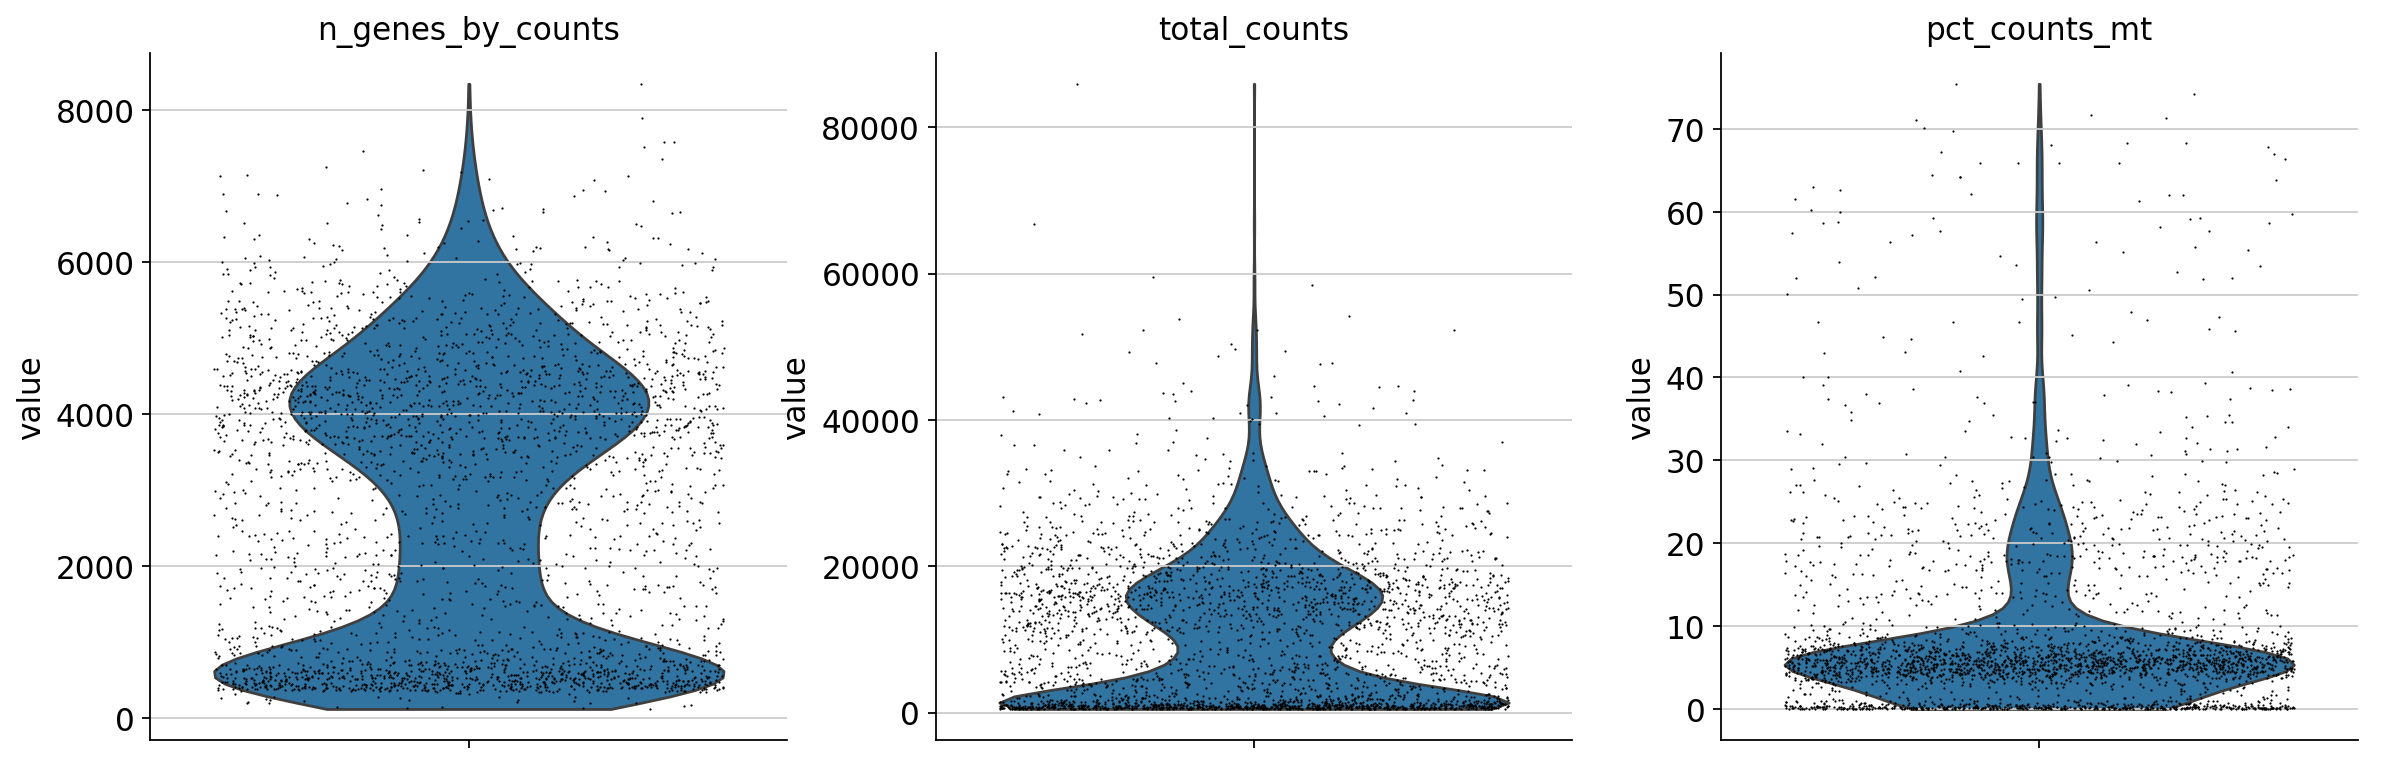

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [12]:
sc.pp.filter_cells(adata, min_genes=200)  # this does nothing, in this specific case
sc.pp.filter_genes(adata, min_cells=3)
adata

filtered out 11 cells that have less than 200 genes expressed
filtered out 17444 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 2998 × 19157
    obs: 'Dose', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

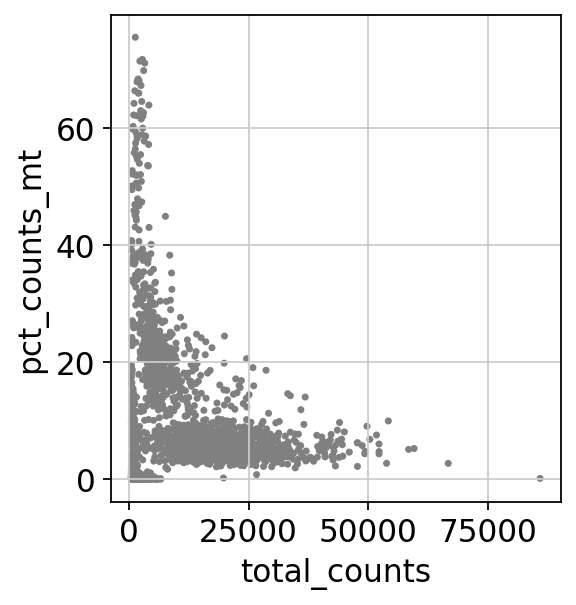

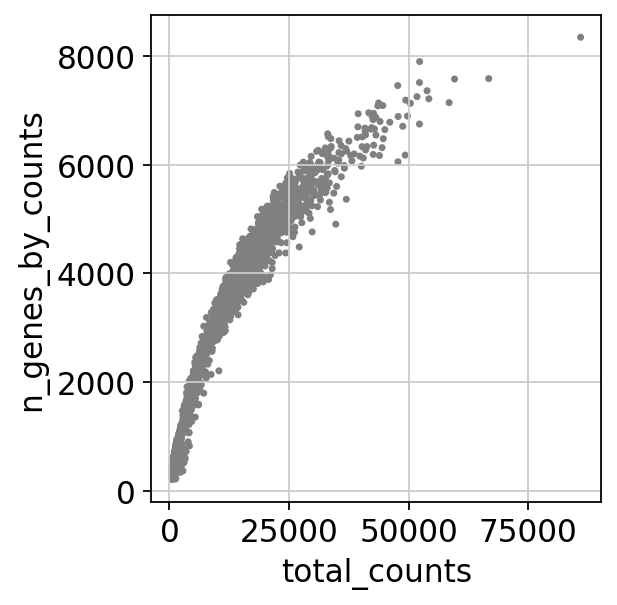

In [13]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [14]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[(adata.obs.pct_counts_mt < 10)].copy()

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [16]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50


/home/user/anaconda3/lib/python3.12/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


    finished (0:00:07)


In [17]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:01)


In [18]:
sc.tl.leiden(adata,resolution=0.10) #,resolution=1,

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/tmp/ipykernel_3954246/3362905214.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.10) #,resolution=1,


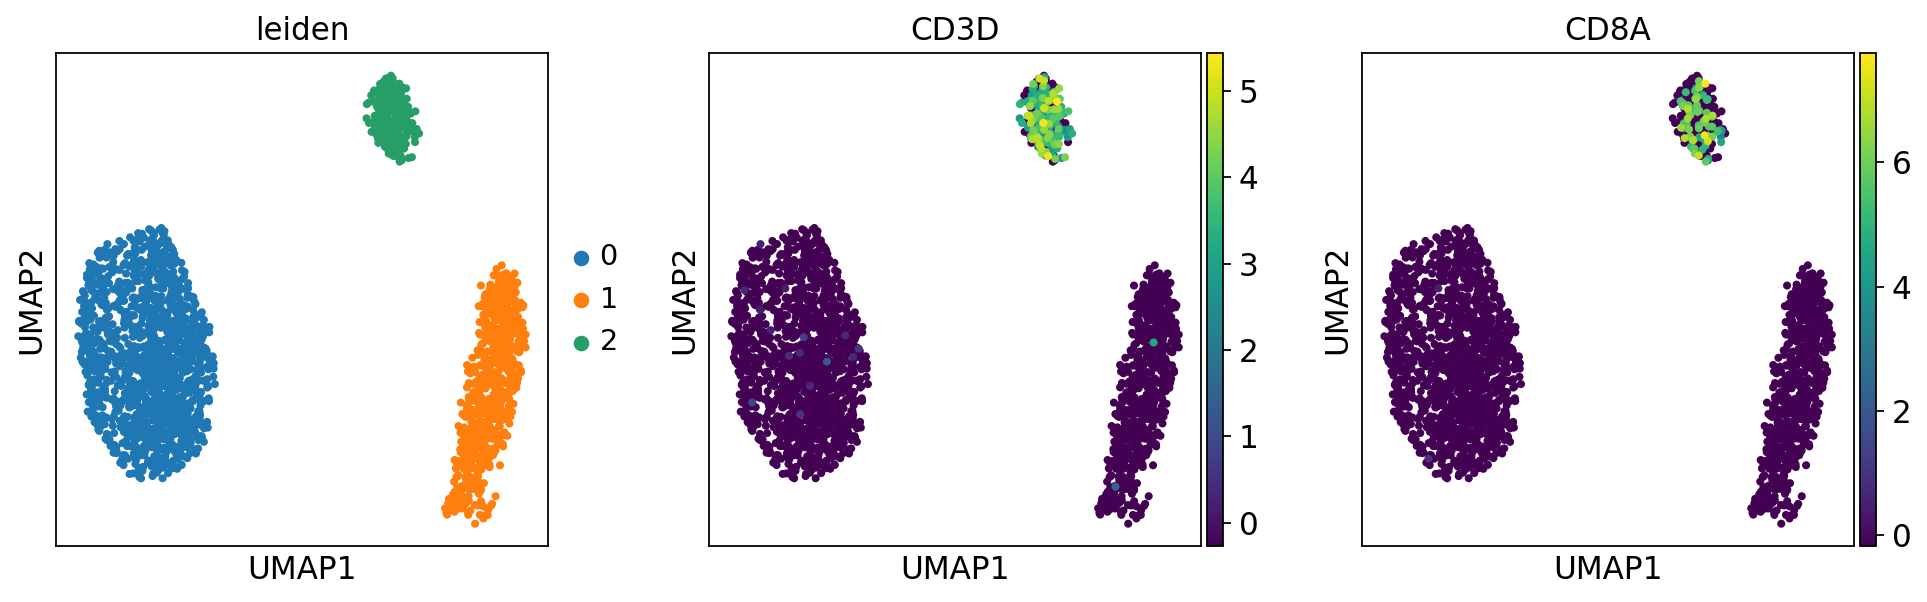

In [19]:
sc.pl.umap(adata, color=['leiden', "CD3D", 'CD8A'], use_raw=False)

In [20]:
new_cluster_names = ['GBM','GBM2', "Tcells"]
adata.rename_categories('leiden', new_cluster_names)

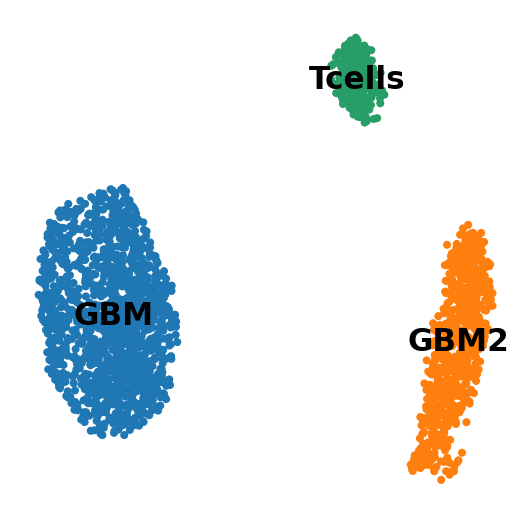

In [21]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [22]:
adata.obs['cell_id'] = adata.obs.index.str.replace(r"-1$", "", regex=True)
adata.obs['cell_id']

AAACCCAAGCAGGCTA-1    AAACCCAAGCAGGCTA
AAACCCAAGTCCCAGC-1    AAACCCAAGTCCCAGC
AAACGAAGTAGTCCTA-1    AAACGAAGTAGTCCTA
AAACGCTAGAAGCTCG-1    AAACGCTAGAAGCTCG
AAACGCTAGTGGATTA-1    AAACGCTAGTGGATTA
                            ...       
TTTGGAGCAGTCCGTG-1    TTTGGAGCAGTCCGTG
TTTGGTTCATGGCACC-1    TTTGGTTCATGGCACC
TTTGTTGAGTTCACTG-1    TTTGTTGAGTTCACTG
TTTGTTGCACCCTAGG-1    TTTGTTGCACCCTAGG
TTTGTTGTCATTGGTG-1    TTTGTTGTCATTGGTG
Name: cell_id, Length: 2283, dtype: object

In [23]:

pd.merge(adata.obs, Nested_PCR_trust_barcodes_df, left_on='cell_id', right_on='cell_id', how='left')

,Dose,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,leiden,cell_id,sequence,rev_comp,...,cdr2,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_identity,j_identity,complete_vdj,consensus_count
0,2,1216,3107.0,3.0,0.096556,1216,GBM2,AAACCCAAGCAGGCTA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4908,23072.0,2057.0,8.915569,4908,GBM,AAACCCAAGTCCCAGC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4045,17112.0,1173.0,6.854839,4045,GBM,AAACGAAGTAGTCCTA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,399,567.0,1.0,0.176367,399,GBM2,AAACGCTAGAAGCTCG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,486,756.0,45.0,5.952381,486,Tcells,AAACGCTAGTGGATTA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2,3557,12331.0,1151.0,9.334198,3557,GBM,TTTGGAGCAGTCCGTG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2279,2,5265,28622.0,882.0,3.081546,5265,GBM,TTTGGTTCATGGCACC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2280,2,4071,16305.0,646.0,3.961975,4071,GBM,TTTGTTGAGTTCACTG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2281,2,4945,19275.0,857.0,4.446174,4945,GBM,TTTGTTGCACCCTAGG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
adata.obs = pd.merge(adata.obs, Nested_PCR_trust_barcodes_df, left_on='cell_id', right_on='cell_id', how='left')

In [25]:
adata.obs = pd.merge(adata.obs, rhpcr_trust_barcodes_df_trb_drop, left_on='cell_id', right_on='cell_id', how='left')

In [26]:
adata

AnnData object with n_obs × n_vars = 2283 × 19157
    obs: 'Dose', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'cell_id', 'sequence_x', 'rev_comp_x', 'productive_x', 'locus_x', 'v_call_x', 'd_call_x', 'j_call_x', 'c_call_x', 'sequence_alignment_x', 'germline_alignment_x', 'cdr1_x', 'cdr2_x', 'junction_x', 'junction_aa_x', 'v_cigar_x', 'd_cigar_x', 'j_cigar_x', 'v_identity_x', 'j_identity_x', 'complete_vdj_x', 'consensus_count_x', 'sequence_y', 'rev_comp_y', 'productive_y', 'locus_y', 'v_call_y', 'd_call_y', 'j_call_y', 'c_call_y', 'sequence_alignment_y', 'germline_alignment_y', 'cdr1_y', 'cdr2_y', 'junction_y', 'junction_aa_y', 'v_cigar_y', 'd_cigar_y', 'j_cigar_y', 'v_identity_y', 'j_identity_y', 'complete_vdj_y', 'consensus_count_y'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'le

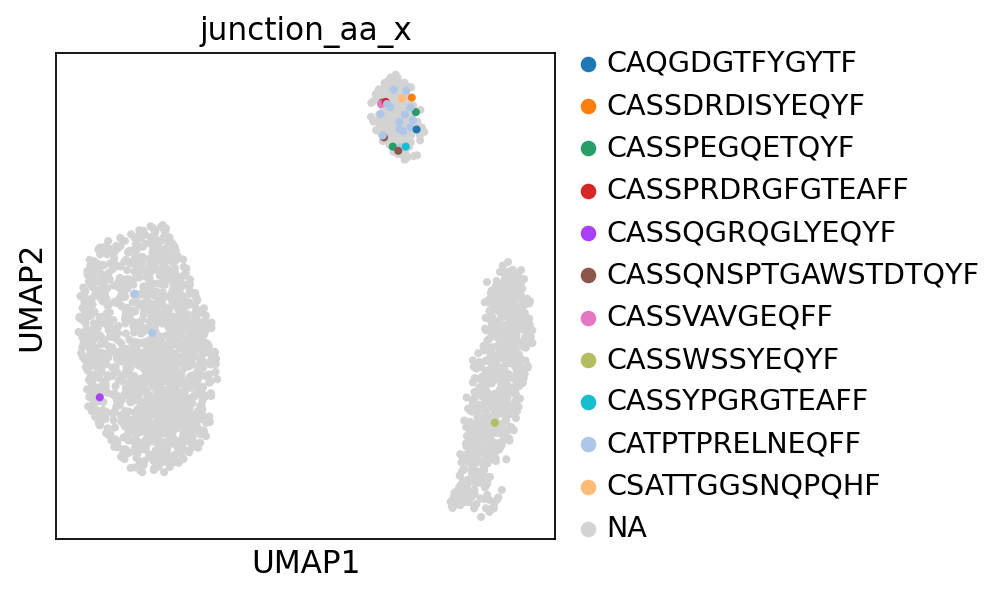

In [27]:
# Nested PCR
sc.pl.umap(adata, color=['junction_aa_x'])

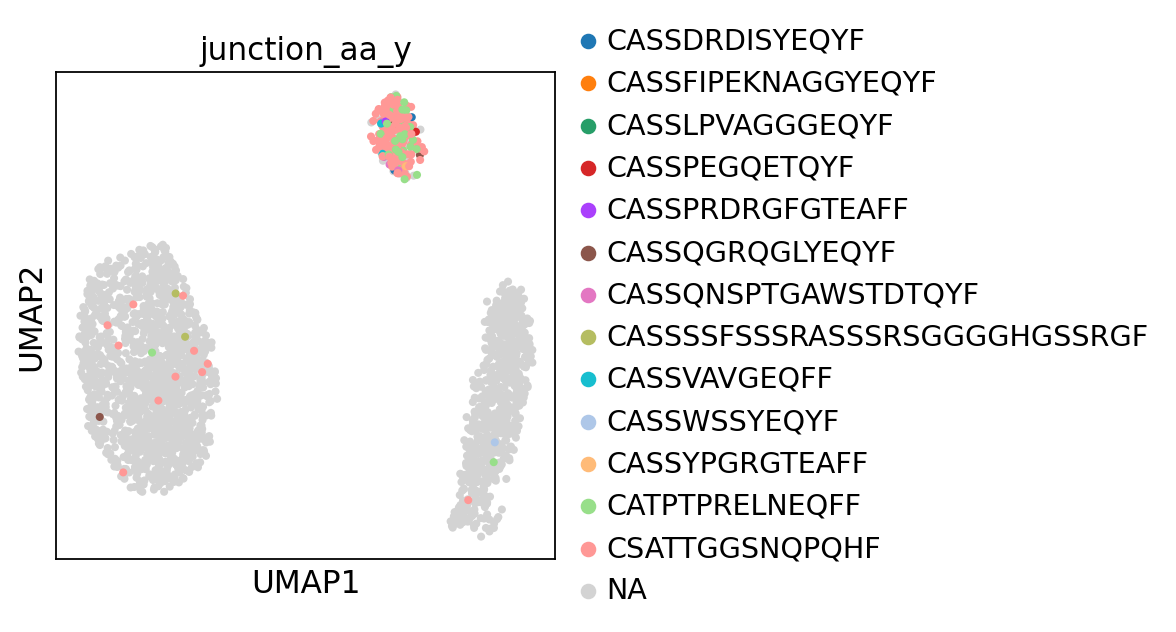

In [28]:
# RHPCR
sc.pl.umap(adata, color=['junction_aa_y'])

                     junction_aa  count_NestedPCR  count_RHPCR  \
13                CSATTGGSNQPQHF                1          154   
12                CATPTPRELNEQFF               17           38   
7            CASSQNSPTGAWSTDTQYF                3            7   
6                CASSQGRQGLYEQYF                1            4   
4                  CASSPEGQETQYF                2            3   
1                 CASSDRDISYEQYF                1            2   
9                   CASSVAVGEQFF                1            2   
8   CASSSSFSSSRASSSRSGGGGHGSSRGF                0            2   
11                CASSYPGRGTEAFF                1            1   
5               CASSPRDRGFGTEAFF                1            1   
10                  CASSWSSYEQYF                1            1   
2             CASSFIPEKNAGGYEQYF                0            1   
0                  CAQGDGTFYGYTF                1            0   
3                CASSLPVAGGGEQYF                0            1   

         

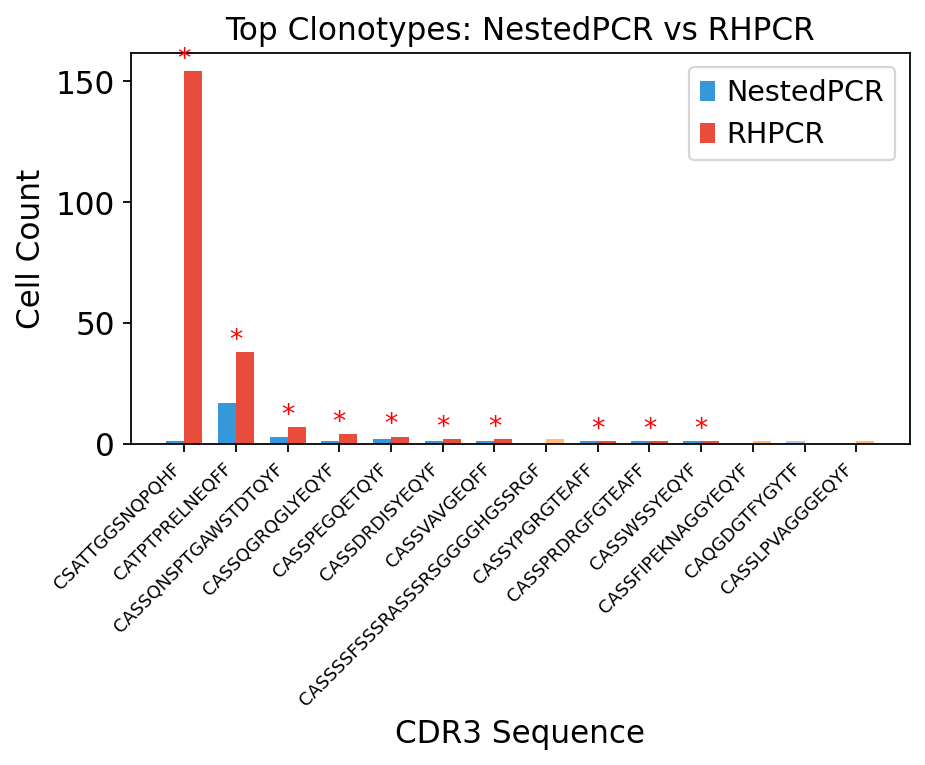


Summary:
Total unique clonotypes in NestedPCR: 11
Total unique clonotypes in RHPCR: 13
Shared clonotypes: 10


In [34]:


# Get counts from both datasets using the _x and _y suffixed columns
counts1 = adata.obs['junction_aa_x'].value_counts().reset_index()
counts1.columns = ['junction_aa', 'count_NestedPCR']
counts2 = adata.obs['junction_aa_y'].value_counts().reset_index()
counts2.columns = ['junction_aa', 'count_RHPCR']

# Remove NaN entries if present
counts1 = counts1[counts1['junction_aa'].notna()]
counts2 = counts2[counts2['junction_aa'].notna()]

# Merge to get all clonotypes
merged = pd.merge(counts1, counts2, on='junction_aa', how='outer').fillna(0)
merged['count_NestedPCR'] = merged['count_NestedPCR'].astype(int)
merged['count_RHPCR'] = merged['count_RHPCR'].astype(int)

# Classify as shared or unique
merged['status'] = 'Unique to NestedPCR'
merged.loc[merged['count_RHPCR'] > 0, 'status'] = 'Unique to RHPCR'
merged.loc[(merged['count_NestedPCR'] > 0) & (merged['count_RHPCR'] > 0), 'status'] = 'Shared'

# Sort by total count
merged['total'] = merged['count_NestedPCR'] + merged['count_RHPCR']
merged = merged.sort_values('total', ascending=False)
print(merged.head(20))

# Plot top clonotypes
fig, ax = plt.subplots(figsize=(6, 5))
top_n = 20
plot_data = merged.head(top_n)

x = np.arange(len(plot_data))
width = 0.35

# Color by shared status
colors1 = ['#3498db' if s == 'Shared' else '#aec7e8' for s in plot_data['status']]
colors2 = ['#e74c3c' if s == 'Shared' else '#ffbb78' for s in plot_data['status']]

bars1 = ax.bar(x - width/2, plot_data['count_NestedPCR'], width, label='NestedPCR', color=colors1)
bars2 = ax.bar(x + width/2, plot_data['count_RHPCR'], width, label='RHPCR', color=colors2)

ax.set_xlabel('CDR3 Sequence')
ax.set_ylabel('Cell Count')
ax.set_title('Top Clonotypes: NestedPCR vs RHPCR')
ax.set_xticks(x)
ax.set_xticklabels(plot_data['junction_aa'], rotation=45, ha='right', fontsize=8)
ax.legend()
# Turn off grid
ax.grid(False)

# Add shared indicator
for i, (idx, row) in enumerate(plot_data.iterrows()):
    if row['status'] == 'Shared':
        ax.annotate('*', (i, max(row['count_NestedPCR'], row['count_RHPCR']) + 2), 
                    ha='center', fontsize=12, color='red')

plt.tight_layout()
plt.savefig('/home/user/Documents/Kinase_project/figures/T_cell_figures/clonotype_comparison_NestedPCR_vs_RHPCR.pdf')
plt.savefig('/home/user/Documents/Kinase_project/figures/T_cell_figures/clonotype_comparison_NestedPCR_vs_RHPCR.png')
plt.savefig('/home/user/Documents/Kinase_project/figures/T_cell_figures/clonotype_comparison_NestedPCR_vs_RHPCR.svg')
plt.show()

# Summary stats
print(f"\nSummary:")
print(f"Total unique clonotypes in NestedPCR: {(merged['count_NestedPCR'] > 0).sum()}")
print(f"Total unique clonotypes in RHPCR: {(merged['count_RHPCR'] > 0).sum()}")
print(f"Shared clonotypes: {(merged['status'] == 'Shared').sum()}")